<a href="https://colab.research.google.com/github/eunji-jeon-res/study/blob/main/Zen/1_8_Exploring_Two_or_More_Variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **데이터 마운트 & 필요한 패키지 설치**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 필요한 패키지 설치 (오래 걸리니, 이미 패키지 설치된 경우 넘어가기)
# !pip install pandas
# !pip install numpy
# !pip install seaborn
# !pip install matplotlib

In [3]:
# 필요한 패키지 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

# **1.8 Exploring Two or More Variables**
## **1.8.1. Visualizing Numeric Data Relationships**
- Hexagonal Binning:
  - Useful for large datasets where scatterplots are too dense
  - Divides data into hexagonal bins; color intensity represents data density



In [4]:
# Read csv
kc_tax = pd.read_csv("/content/drive/Shareddrives/Communication Site/5-스터디/[2023] 통계스터디 /Practical Statistics for Data Scientistis: 데이터과학을 위한 통계/Python/data/kc_tax.csv.gz", compression='gzip')

# Filter rows where the TaxAssessedValue is less than 750,000
# SqFtTotLiving is between 100 and 3500, and assign the result to a new DataFrame (kc_tax0)
# The .shape function is used to get the number of rows and columns in the filtered DataFrame

kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) &
                     (kc_tax.SqFtTotLiving > 100) &
                     (kc_tax.SqFtTotLiving < 3500), :]
kc_tax0.shape

(432693, 3)

Text(0, 0.5, 'Tax-Assessed Value')

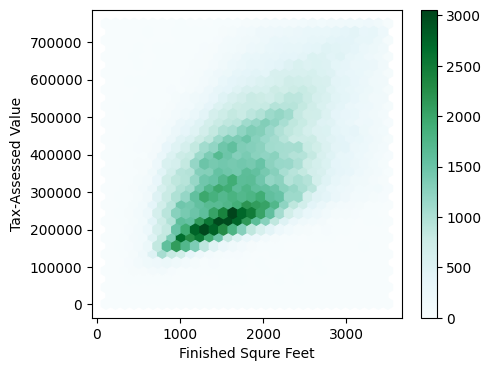

In [5]:
# "SqFtTotLiving"과 "TaxAssessedValue" 간의 관계를 hexbin 그래프로 시각화
# gridsize는 그래프의 격자 크기, sharex는 x축을 공유할지 여부, figsize는 그래프 크기 설정
ax = kc_tax0.plot.hexbin(x = "SqFtTotLiving", y = "TaxAssessedValue",
                         gridsize = 30, sharex = False, figsize = (5,4))

# x축 레이블 설정
ax.set_xlabel("Finished Squre Feet")

# y축 레이블 설정: 'Tax-Assessed Value'로 표시
ax.set_ylabel("Tax-Assessed Value")

- Contour Plots:
  - Displays the density of two numeric variables as contour lines, making high-density regions more apparent

In [6]:
print(kc_tax0[["SqFtTotLiving", "TaxAssessedValue"]].dtypes)
print(kc_tax0[["SqFtTotLiving", "TaxAssessedValue"]].isnull().sum())

SqFtTotLiving         int64
TaxAssessedValue    float64
dtype: object
SqFtTotLiving       0
TaxAssessedValue    0
dtype: int64


In [ ]:
# "SqFtTotLiving"과 "TaxAssessedValue" 간의 밀도 추정 그래프 그리기

# 4x4 인치 크기의 그래프 생성
fig, ax = plt.subplots(figsize = (4, 4))

# ax는 이전에 생성한 그래프의 축 객체를 사용
sns.kdeplot(data = kc_tax0, x = "SqFtTotLiving", y = "TaxAssessedValue", ax = ax, bw_adjust = 0.5)

# x축 레이블 설정
ax.set_xlabel("Finished Square Feet")

# y축 레이블 설정
ax.set_ylabel("Tax-Assessed Value")

## **1.8.2 Two Categorical Variables**
- **Contingency Table**: A table that shows the frequency of combinations of two categorical variables


In [8]:
# 데이터 불러오기
lc_loans = pd.read_csv("/content/drive/Shareddrives/Communication Site/5-스터디/[2023] 통계스터디 /Practical Statistics for Data Scientistis: 데이터과학을 위한 통계/Python/data/lc_loans.csv")

In [9]:
# 'grade'를 기준으로 행, 'status'를 기준으로 열로 피벗 테이블 생성
# 각 셀에는 각 조합에 해당하는 값의 개수를 계산하여 채움
# margins=True는 행과 열의 합계를 추가
crosstab = lc_loans.pivot_table(
    index='grade',
    columns='status',
    aggfunc=lambda x: len(x),
    margins=True
)

# crosstab 데이터프레임의 모든 값을 float64로 변환
crosstab = crosstab.astype('float64')

# 결과 출력
print(crosstab)

status  Charged Off   Current  Fully Paid    Late       All
grade                                                      
A            1562.0   50051.0     20408.0   469.0   72490.0
B            5302.0   93852.0     31160.0  2056.0  132370.0
C            6023.0   88928.0     23147.0  2777.0  120875.0
D            5007.0   53281.0     13681.0  2308.0   74277.0
E            2842.0   24639.0      5949.0  1374.0   34804.0
F            1526.0    8444.0      2328.0   606.0   12904.0
G             409.0    1990.0       643.0   199.0    3241.0
All         22671.0  321185.0     97316.0  9789.0  450961.0


In [10]:
# 'A'부터 'G'까지의 행을 선택하여 새로운 데이터프레임 df 생성
df = crosstab.copy().loc['A':'G', :]

# 'All' 열을 float64로 변환하여 데이터 타입 호환 문제 해결
df['All'] = df['All'].astype('float64')

# 'Charged Off'부터 'Late'까지의 열에 대해 'All' 열 값을 기준으로 비율 계산
# div 연산 후 결과를 float64로 변환
df.loc[:, 'Charged Off':'Late'] = df.loc[:, 'Charged Off':'Late'].div(df['All'], axis=0).astype('float64')

# 'All' 열의 값을 전체 합으로 나누어 비율로 변환
df['All'] = df['All'] / sum(df['All'])

# 결과를 perc_crosstab에 저장
perc_crosstab = df

# 결과 출력
print(perc_crosstab)

status  Charged Off   Current  Fully Paid      Late       All
grade                                                        
A          0.021548  0.690454    0.281528  0.006470  0.160746
B          0.040054  0.709013    0.235401  0.015532  0.293529
C          0.049828  0.735702    0.191495  0.022974  0.268039
D          0.067410  0.717328    0.184189  0.031073  0.164708
E          0.081657  0.707936    0.170929  0.039478  0.077177
F          0.118258  0.654371    0.180409  0.046962  0.028614
G          0.126196  0.614008    0.198396  0.061401  0.007187


## **1.8.3 Categorical and Numeric Data Relationships**
- **Boxplot**: Groups numeric data by categories to compare distributions

Text(0, 0.5, 'Daily % of Delayed Flights')

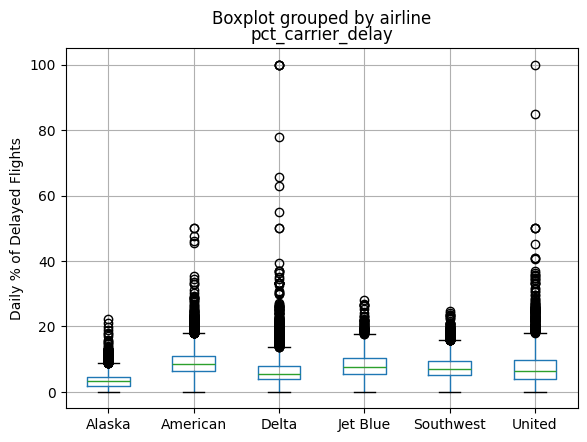

In [11]:
import matplotlib.pyplot as plt

# CSV 파일을 읽어 'airline_stats' 데이터프레임에 저장
airline_stats = pd.read_csv("/content/drive/Shareddrives/Communication Site/5-스터디/[2023] 통계스터디 /Practical Statistics for Data Scientistis: 데이터과학을 위한 통계/Python/data/airline_stats.csv")

# 'airline'을 기준으로 'pct_carrier_delay' 열에 대한 박스 플롯 생성
ax = airline_stats.boxplot(by="airline", column="pct_carrier_delay")

# x축 레이블 제거 (자동으로 생성된 x축 레이블을 없앰)
ax.set_xlabel("")

# y축 레이블을 "Daily % of Delayed Flights"로 설정
ax.set_ylabel("Daily % of Delayed Flights")

# 그룹화된 플롯의 제목 제거
# plt.suptitle("")

- **Violin Plot**:
Enhances boxplots by including density information to show the full distribution of data

Text(0, 0.5, 'Daily % of Delayed Flights')

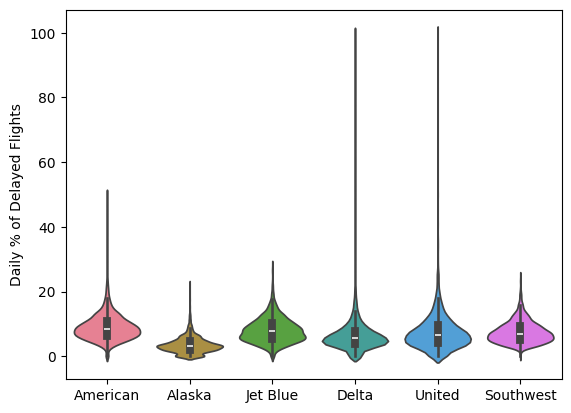

In [12]:
# violin plot 생성: 색상 팔레트를 husl로 지정
ax = sns.violinplot(
    data=airline_stats,
    x='airline',
    y='pct_carrier_delay',
    hue='airline',
    palette='husl',
    legend=False # 범례 숨기기
)

# cf) palette
# palette='set2' (다양한 명도)
# palette='Paired' (두 개씩 짝)

# x축 레이블을 빈 문자열로 설정 (자동으로 생성된 레이블 제거)
ax.set_xlabel("")

# y축 레이블을 "Daily % of Delayed Flights"로 설정
ax.set_ylabel("Daily % of Delayed Flights")

## **1.8.4 Visualizing Multiple Variables**
-  **Faceting**:
Splits data into subsets based on a variable and generates separate plots for each subset. Helps reveal differences across groups

In [13]:
# read csv data
kc_tax = pd.read_csv("/content/drive/Shareddrives/Communication Site/5-스터디/[2023] 통계스터디 /Practical Statistics for Data Scientistis: 데이터과학을 위한 통계/Python/data/kc_tax.csv.gz")

# 조건에 맞는 행들을 필터링하여 새로운 데이터프레임 'kc_tax0' 생성
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) &
                     (kc_tax.SqFtTotLiving > 100) &
                     (kc_tax.SqFtTotLiving < 3500), :]

# 상위 5개 데이터를 확인
kc_tax0.head()

,TaxAssessedValue,SqFtTotLiving,ZipCode
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
5,223000.0,1570,98032.0


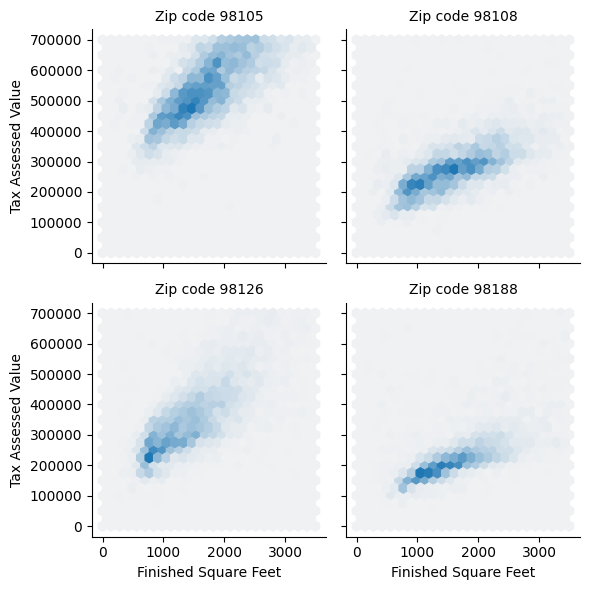

In [14]:
# 관심 있는 우편번호 목록을 지정
zip_codes = [98188, 98105, 98108, 98126]

# 'ZipCode' 열이 지정된 우편번호 목록에 포함된 행만 필터링하여 새로운 데이터프레임 생성
kc_tax_zip = kc_tax0.loc[kc_tax0.ZipCode.isin(zip_codes), :]

# 필터링된 데이터프레임 출력
kc_tax_zip

# 'hexbin' 함수 정의: 두 변수(x, y)에 대해 헥스빈 플롯을 그리는 함수
# 'color'는 색상 지정, **kwargs는 추가적인 인자들을 받음
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)  # 색상 맵 생성
    plt.hexbin(x, y, gridsize=25, cmap=cmap, **kwargs)  # 헥스빈 플롯 생성

# 'kc_tax_zip' 데이터에 대해 'ZipCode'별로 FacetGrid를 생성하고, 헥스빈 플롯을 그리기
# col='ZipCode'는 각 우편번호별로 그래프를 나누며, col_wrap=2는 한 행에 2개의 그래프를 배치
g = sns.FacetGrid(kc_tax_zip, col='ZipCode', col_wrap=2)

# 'SqFtTotLiving'과 'TaxAssessedValue'를 x, y로 하여 'hexbin' 함수 적용
# extent=[0, 3500, 0, 700000]은 x와 y의 범위를 설정
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue', extent=[0, 3500, 0, 700000])

# x축과 y축 레이블을 설정
g.set_axis_labels('Finished Square Feet', 'Tax Assessed Value')

# 각 서브플롯의 제목을 'Zip code {col_name:.0f}' 형식으로 설정
g.set_titles('Zip code {col_name:.0f}')